# Data Preprocessing

In [21]:
# This script suppresses all warning messages.
import warnings
warnings.filterwarnings('ignore')

In [22]:
# This code sets the width of the Jupyter notebook container to 70% of the window width.
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [23]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Loading the dataset
df = pd.read_csv("../diabetes.csv") 

## Examining the Dataset

In [25]:
# Display the first few rows of the dataset
df.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
columns_with_zeroes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count and print the number of zero values in each specified column
for col in columns_with_zeroes:
    print(f"Number of rows with zero value in the {col} column {(df[col] == 0).sum()}")

Number of rows with zero value in the Glucose column 5
Number of rows with zero value in the BloodPressure column 35
Number of rows with zero value in the SkinThickness column 227
Number of rows with zero value in the Insulin column 374
Number of rows with zero value in the BMI column 11


In [27]:
# Replace zero values with NaN in specified columns
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

In [28]:
# Check for NaN values in the dataset
nan_exists_all = df.isna().any()
print(nan_exists_all)

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [29]:
# Calculate and display the percentage of non-missing values in each column
occupancy_rate = df.notna().mean() * 100
occupancy_rate

Pregnancies                 100.000000
Glucose                      99.348958
BloodPressure                95.442708
SkinThickness                70.442708
Insulin                      51.302083
BMI                          98.567708
DiabetesPedigreeFunction    100.000000
Age                         100.000000
Outcome                     100.000000
dtype: float64

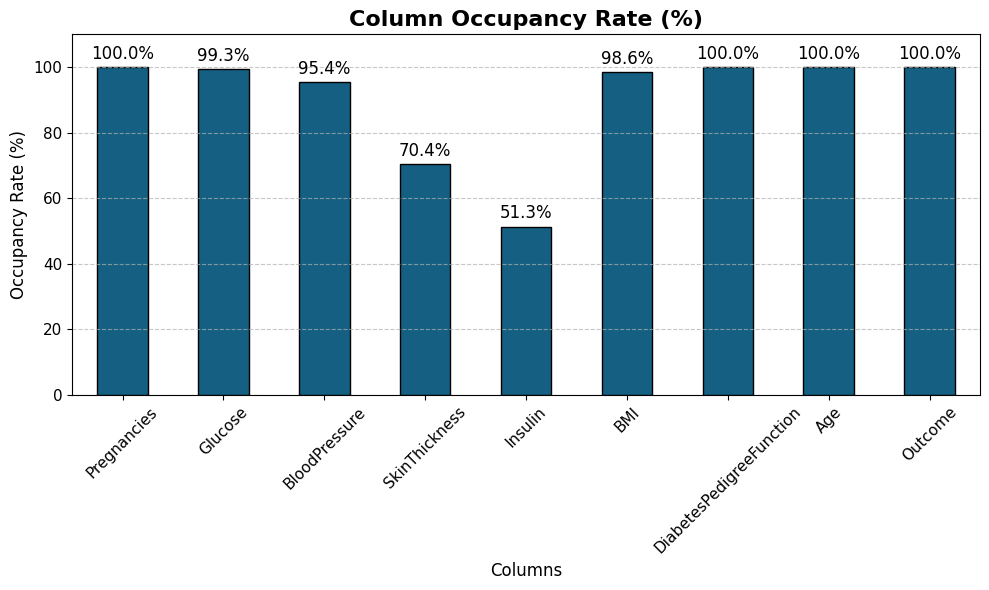

In [30]:
# Visualize the occupancy rates
plt.figure(figsize=(10, 6))
ax = occupancy_rate.plot(kind='bar', color='#156082', edgecolor='black')

plt.title('Column Occupancy Rate (%)', fontsize=16, fontweight='bold')
plt.ylabel('Occupancy Rate (%)', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=12, fmt='%.1f%%')

plt.ylim(0, 110)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Calculate and print the count of non-missing values in each column
occupancy_rate = df.notna().sum()
print(occupancy_rate)

Pregnancies                 768
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64


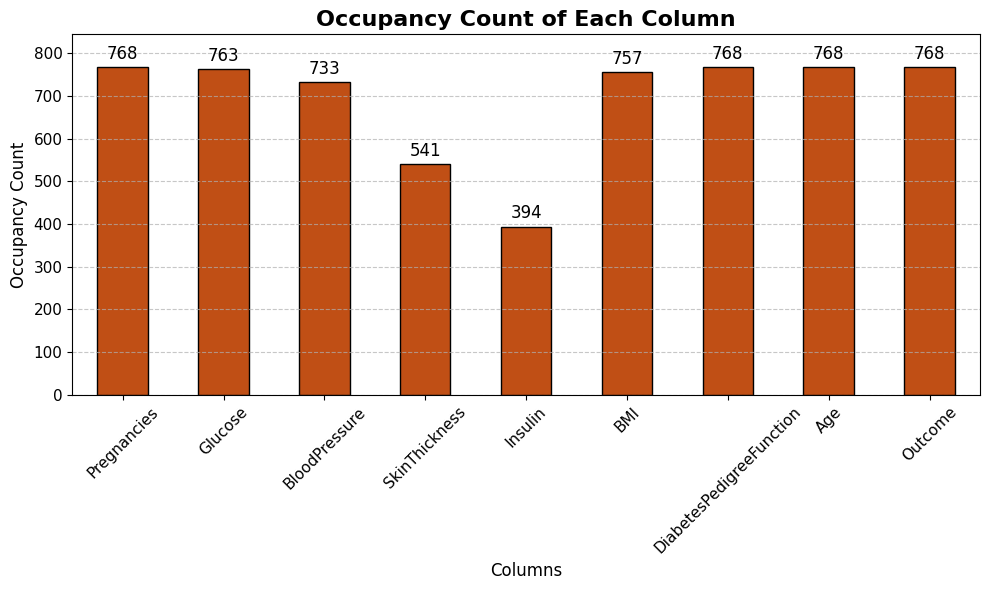

In [41]:
# Visualize the count of non-missing values
plt.figure(figsize=(10, 6))
ax = occupancy_rate.plot(kind='bar', color='#C04F15', edgecolor='black')

plt.title('Occupancy Count of Each Column', fontsize=16, fontweight='bold')
plt.ylabel('Occupancy Count', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=12)

plt.ylim(0, occupancy_rate.max() * 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Calculate and print the mode (most frequent) value for each column, excluding zeros
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Calculate and print the mode for each specified column
for col in columns_with_zeros:
    mod_value = df[df[col] != 0][col].mode()[0]
    print(f"Moderate (most frequent) value of the {col} column: {mod_value}")


Moderate (most frequent) value of the Glucose column: 99.0
Moderate (most frequent) value of the BloodPressure column: 70.0
Moderate (most frequent) value of the SkinThickness column: 32.0
Moderate (most frequent) value of the Insulin column: 105.0
Moderate (most frequent) value of the BMI column: 32.0


In [ ]:
# Replace NaN values with the mode (most frequent) value for each specified column
for col in columns_with_zeros:
    mod_value = df[df[col] != 0][col].mode()[0]
    df[col].fillna(mod_value, inplace=True)

# Verify that there are no more NaN values in the dataset
nan_exists_after = df.isna().any()
print(nan_exists_after)

# Display the first few rows of the cleaned dataset
df.head()


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
Age_Group                   False
dtype: bool


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group
0,6,148.0,72.0,35.0,105.0,33.6,0.627,50,1,50-59
1,1,85.0,66.0,29.0,105.0,26.6,0.351,31,0,30-39
2,8,183.0,64.0,32.0,105.0,23.3,0.672,32,1,30-39
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,20-29
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,30-39


## Outlier Detection

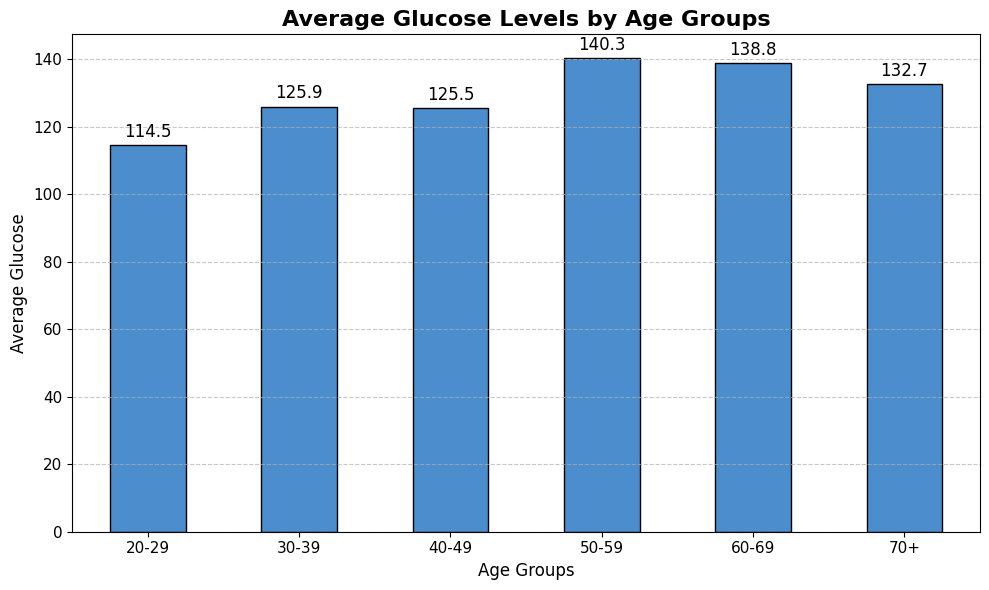

In [58]:
# Create age groups
bins = [20, 30, 40, 50, 60, 70, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average glucose levels by age group
glucose_by_age_group = df.groupby('Age_Group', observed=False)['Glucose'].mean()

# Bar graph
plt.figure(figsize=(10, 6))
ax = glucose_by_age_group.plot(kind='bar', color='#4B8DCD', edgecolor='black')

plt.title('Average Glucose Levels by Age Groups', fontsize=16, fontweight='bold')
plt.ylabel('Average Glucose', fontsize=12)
plt.xlabel('Age Groups', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=12, fmt='%.1f')

plt.tight_layout()
plt.show()


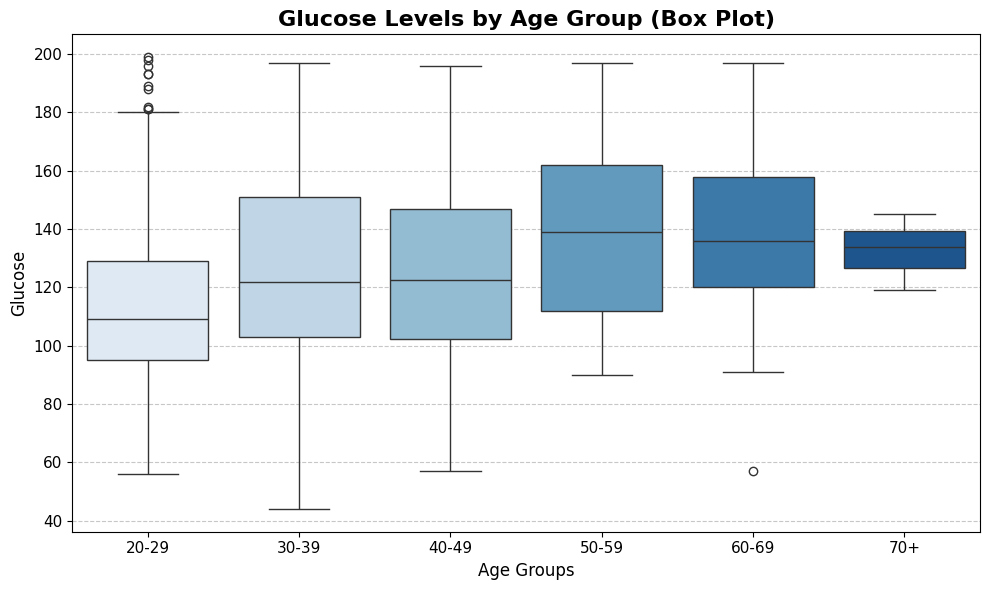

In [59]:
# Visualize glucose levels by age group using a box plot
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='Glucose', palette='Blues')

plt.title('Glucose Levels by Age Group (Box Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Glucose', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Outlier Count (Insulin): 20


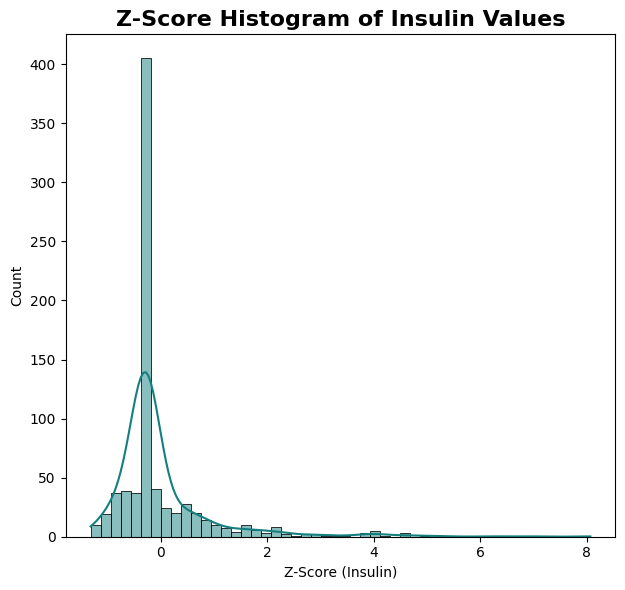

In [52]:
from scipy.stats import zscore

# Outlier Analysis (Using Z-score)
df['z_score_insulin'] = zscore(df['Insulin'])

# Select outliers (|Z| > 3)
outliers_insulin = df[df['z_score_insulin'].abs() > 3]

# Print the count of outliers
print(f"Outlier Count (Insulin): {outliers_insulin.shape[0]}")



# Visualize the Z-score distribution for Insulin values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(df['z_score_insulin'], bins=50, color='#157F7F', kde=True)
plt.title('Z-Score Histogram of Insulin Values', fontsize=16, fontweight='bold')
plt.xlabel('Z-Score (Insulin)')
plt.tight_layout()
plt.show()



In [53]:
# Print the first 100 rows of outliers for Insulin
print("Outlier Rows (First 100) for Insulin:")
print(outliers_insulin[['Insulin', 'z_score_insulin']].head(100))

Outlier Rows (First 100) for Insulin:
     Insulin  z_score_insulin
8      543.0         4.648638
13     846.0         8.066856
111    495.0         4.107138
153    485.0         3.994326
186    495.0         4.107138
220    478.0         3.915357
228    744.0         6.916169
247    680.0         6.194169
248    402.0         3.057982
286    545.0         4.671200
370    465.0         3.768701
392    415.0         3.204638
409    579.0         5.054763
415    474.0         3.870232
486    480.0         3.937919
584    600.0         5.291669
645    440.0         3.486669
655    540.0         4.614794
695    480.0         3.937919
753    510.0         4.276357


Size of cleaned dataset (Insulin): 748


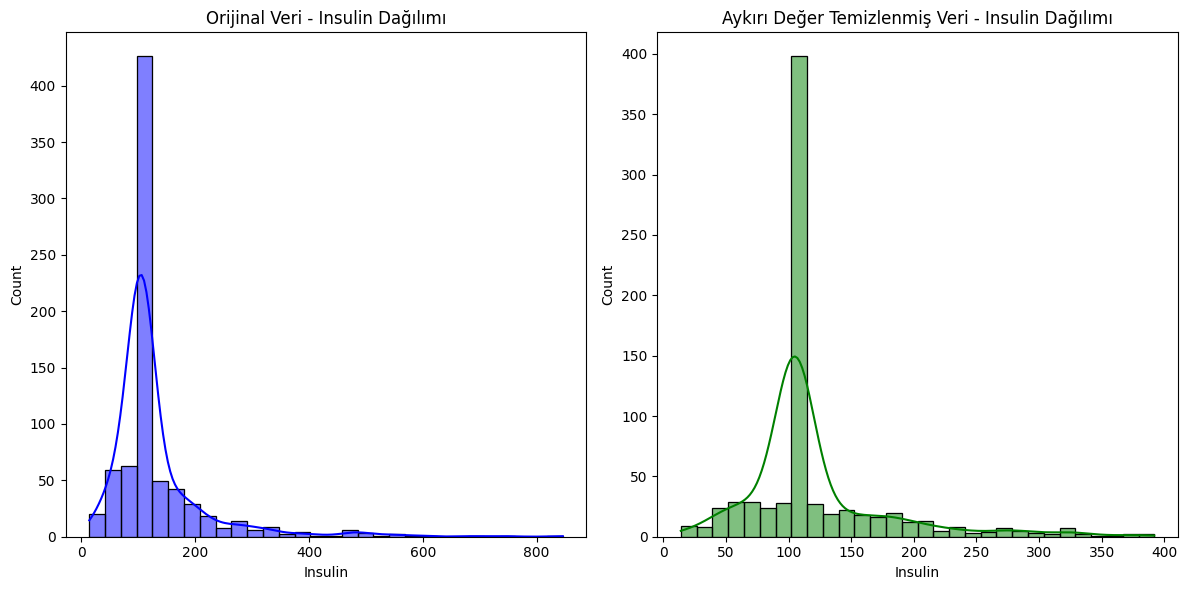

In [54]:
# Remove outliers based on Z-score
df_insulin_cleaned = df[df['z_score_insulin'].abs() <= 3]

# Size of cleaned dataset
print(f"Size of cleaned dataset (Insulin): {df_insulin_cleaned.shape[0]}")

# Visualize original vs cleaned data histograms
plt.figure(figsize=(12, 6))

# Original data histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Insulin'], kde=True, color='blue', bins=30)
plt.title('Orijinal Veri - Insulin Dağılımı')
plt.xlabel('Insulin')

# Cleaned data histogram
plt.subplot(1, 2, 2)
sns.histplot(df_insulin_cleaned['Insulin'], kde=True, color='green', bins=30)
plt.title('Aykırı Değer Temizlenmiş Veri - Insulin Dağılımı')
plt.xlabel('Insulin')

plt.tight_layout()
plt.show()


In [56]:
# Min-Max Normalization (Insulin)
from sklearn.preprocessing import MinMaxScaler

if df_insulin_cleaned.shape[0] == 0:
    print("No rows available for normalization — DataFrame is empty.")
else:
    scaler = MinMaxScaler()
    df_insulin_cleaned = df_insulin_cleaned.assign(
        Insulin_normalized = scaler.fit_transform(df_insulin_cleaned[['Insulin']])
    )
    print(df_insulin_cleaned.head())

scaler = MinMaxScaler()

df_insulin_cleaned = df_insulin_cleaned.assign(
    Insulin_normalized = scaler.fit_transform(df_insulin_cleaned[['Insulin']])
)

# Display the first and last 10 rows of the normalized Insulin values
print("First 10 Rows:")
print(df_insulin_cleaned[['Insulin', 'Insulin_normalized']].head(10))

print("\nLast 10 Rows:")
print(df_insulin_cleaned[['Insulin', 'Insulin_normalized']].tail(10))


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    105.0  33.6   
1            1     85.0           66.0           29.0    105.0  26.6   
2            8    183.0           64.0           32.0    105.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome Age_Group  z_score_insulin  \
0                     0.627   50        1     50-59        -0.292549   
1                     0.351   31        0     30-39        -0.292549   
2                     0.672   32        1     30-39        -0.292549   
3                     0.167   21        0     20-29        -0.416642   
4                     2.288   33        1     30-39         0.418170   

   Insulin_normalized  
0            0.240741  
1            0.240741  
2            0.240741  
3            0.211640  
4            0

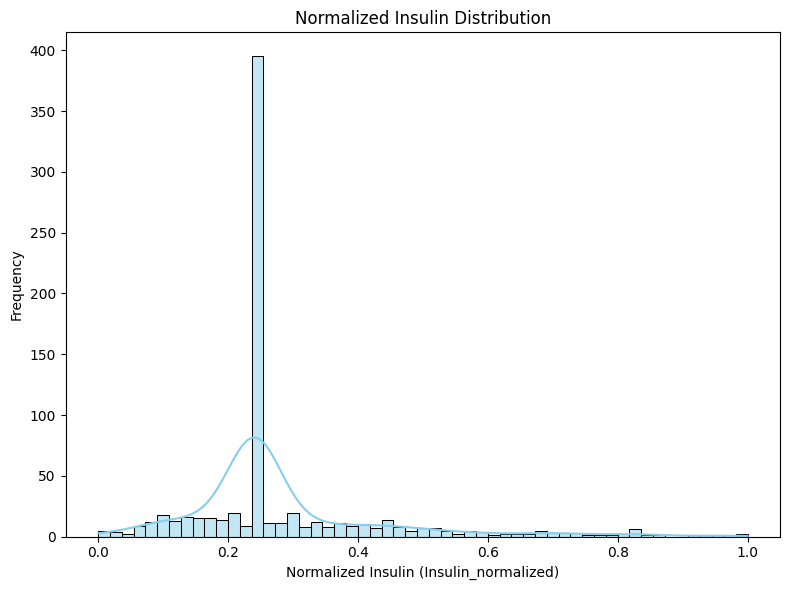

In [57]:
# Visualize the distribution of normalized Insulin values
plt.figure(figsize=(8, 6))
sns.histplot(df_insulin_cleaned['Insulin_normalized'], kde=True, color='skyblue')
plt.title('Normalized Insulin Distribution')
plt.xlabel('Normalized Insulin (Insulin_normalized)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
